In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
train_data.shape

(25000,)

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
len(train_data[0])

218

In [12]:
train_labels[0]

1

In [13]:
train_data[100]

[1,
 13,
 244,
 6,
 87,
 337,
 7,
 628,
 2219,
 5,
 28,
 285,
 15,
 240,
 93,
 23,
 288,
 549,
 18,
 1455,
 673,
 4,
 241,
 534,
 3635,
 8448,
 20,
 38,
 54,
 13,
 258,
 46,
 44,
 14,
 13,
 1241,
 7258,
 12,
 5,
 5,
 51,
 9,
 14,
 45,
 6,
 762,
 7,
 2,
 1309,
 328,
 5,
 428,
 2473,
 15,
 26,
 1292,
 5,
 3939,
 6728,
 5,
 1960,
 279,
 13,
 92,
 124,
 803,
 52,
 21,
 279,
 14,
 9,
 43,
 6,
 762,
 7,
 595,
 15,
 16,
 2,
 23,
 4,
 1071,
 467,
 4,
 403,
 7,
 628,
 2219,
 8,
 97,
 6,
 171,
 3596,
 99,
 387,
 72,
 97,
 12,
 788,
 15,
 13,
 161,
 459,
 44,
 4,
 3939,
 1101,
 173,
 21,
 69,
 8,
 401,
 2,
 4,
 481,
 88,
 61,
 4731,
 238,
 28,
 32,
 11,
 32,
 14,
 9,
 6,
 545,
 1332,
 766,
 5,
 203,
 73,
 28,
 43,
 77,
 317,
 11,
 4,
 2,
 953,
 270,
 17,
 6,
 3616,
 13,
 545,
 386,
 25,
 92,
 1142,
 129,
 278,
 23,
 14,
 241,
 46,
 7,
 158]

In [14]:
len(train_data[100])

158

In [15]:
train_labels[100]

0

In [16]:
tokenizer = Tokenizer(num_words=10000)
X_train = tokenizer.sequences_to_matrix(train_data, mode='binary')
X_test = tokenizer.sequences_to_matrix(train_data, mode='binary')

In [17]:
X_train.shape

(25000, 10000)

In [18]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [21]:
X_train.shape, X_val.shape

((22500, 10000), (2500, 10000))

In [26]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 320,577
Trainable params: 320,577
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=512,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/20
44/44 [==============================] - 1s 26ms/step - loss: 0.4217 - accuracy: 0.8254 - val_loss: 0.2795 - val_accuracy: 0.8944
Epoch 2/20
44/44 [==============================] - 1s 23ms/step - loss: 0.2113 - accuracy: 0.9204 - val_loss: 0.2662 - val_accuracy: 0.8984
Epoch 3/20
44/44 [==============================] - 1s 21ms/step - loss: 0.1514 - accuracy: 0.9466 - val_loss: 0.2852 - val_accuracy: 0.8896
Epoch 4/20
44/44 [==============================] - 1s 21ms/step - loss: 0.1159 - accuracy: 0.9624 - val_loss: 0.3188 - val_accuracy: 0.8872
Epoch 5/20
44/44 [==============================] - 1s 21ms/step - loss: 0.0893 - accuracy: 0.9724 - val_loss: 0.3542 - val_accuracy: 0.8840
Epoch 6/20
44/44 [==============================] - 1s 22ms/step - loss: 0.0673 - accuracy: 0.9811 - val_loss: 0.3894 - val_accuracy: 0.8788
Epoch 7/20
44/44 [==============================] - 1s 22ms/step - loss: 0.0515 - accuracy: 0.9879 - val_loss: 0.4397 - val_accuracy: 0.8744
Epoch 8/20
44

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

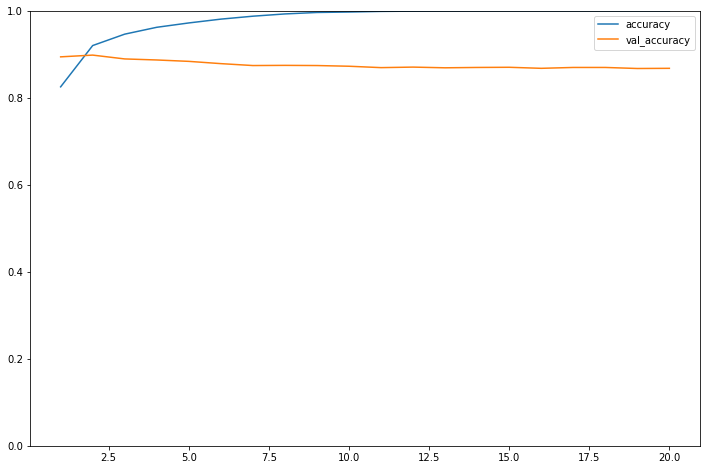

In [32]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.ylim((0, 1))
plt.legend(loc='best')
plt.show()

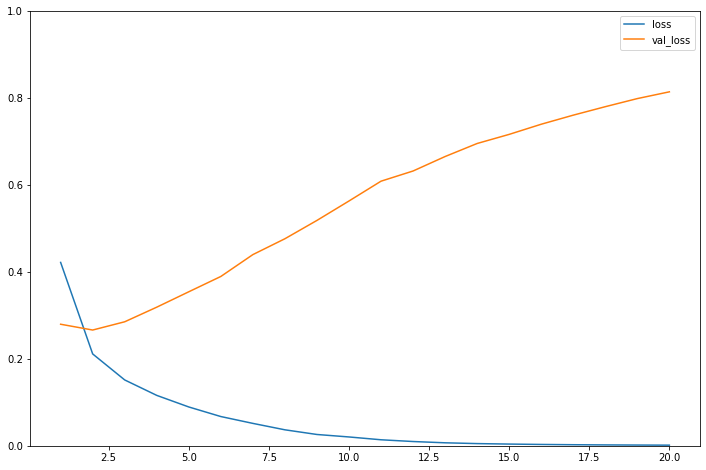

In [34]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.ylim((0, 1))
plt.legend(loc='best')
plt.show()

In [37]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]

In [38]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=512,
    verbose=1,
    callbacks=callbacks,
    validation_data=(X_val, y_val)
)

Epoch 1/20
44/44 [==============================] - 1s 19ms/step - loss: 1.3456e-04 - accuracy: 1.0000 - val_loss: 1.0894 - val_accuracy: 0.8672
Epoch 2/20
44/44 [==============================] - 1s 17ms/step - loss: 1.2349e-04 - accuracy: 1.0000 - val_loss: 1.1005 - val_accuracy: 0.8672
Epoch 3/20
44/44 [==============================] - 1s 17ms/step - loss: 1.1355e-04 - accuracy: 1.0000 - val_loss: 1.1123 - val_accuracy: 0.8668
Epoch 4/20
44/44 [==============================] - 1s 17ms/step - loss: 1.0468e-04 - accuracy: 1.0000 - val_loss: 1.1209 - val_accuracy: 0.8668


In [39]:
score = model.evaluate(X_test, y_test)
print(f'Test set loss: {score[0]}, Tset set accuracy: {score[1]}')

782/782 [==============================] - 2s 2ms/step - loss: 9.2349 - accuracy: 0.4972
Test set loss: 9.23487663269043, Tset set accuracy: 0.49724000692367554


In [40]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(10000,)))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=512,
    verbose=1,
    callbacks=callbacks,
    validation_data=(X_val, y_val)
)

Epoch 1/20
44/44 [==============================] - 2s 37ms/step - loss: 0.6113 - accuracy: 0.7462 - val_loss: 0.5376 - val_accuracy: 0.8212
Epoch 2/20
44/44 [==============================] - 0s 10ms/step - loss: 0.4920 - accuracy: 0.8514 - val_loss: 0.4595 - val_accuracy: 0.8564
Epoch 3/20
44/44 [==============================] - 0s 11ms/step - loss: 0.4267 - accuracy: 0.8747 - val_loss: 0.4137 - val_accuracy: 0.8692
Epoch 4/20
44/44 [==============================] - 0s 10ms/step - loss: 0.3836 - accuracy: 0.8874 - val_loss: 0.3825 - val_accuracy: 0.8720
Epoch 5/20
44/44 [==============================] - 0s 11ms/step - loss: 0.3525 - accuracy: 0.8964 - val_loss: 0.3605 - val_accuracy: 0.8780
Epoch 6/20
44/44 [==============================] - 0s 10ms/step - loss: 0.3285 - accuracy: 0.9022 - val_loss: 0.3433 - val_accuracy: 0.8800
Epoch 7/20
44/44 [==============================] - 0s 11ms/step - loss: 0.3091 - accuracy: 0.9074 - val_loss: 0.3299 - val_accuracy: 0.8836
Epoch 8/20
44

In [41]:
score = model.evaluate(X_test, y_test)
print(f'Test set loss: {score[0]}, Tset set accuracy: {score[1]}')

782/782 [==============================] - 1s 1ms/step - loss: 1.5119 - accuracy: 0.4962
Test set loss: 1.5118725299835205, Tset set accuracy: 0.4962399899959564
